[Back to Lecture Overview](Overview.ipynb)

# Read data from csv File

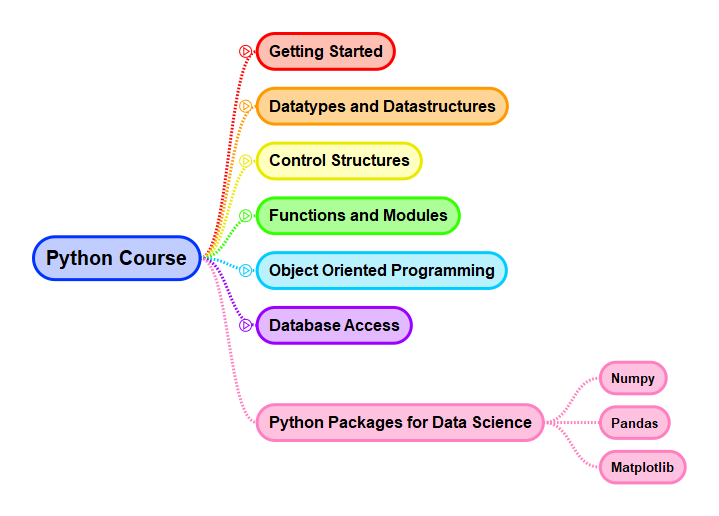

In [3]:
from IPython.display import Image
Image(filename="../../Pics/DS_Python_Libs_All.PNG")

The data we like to analyse in this notebook is contained in .csv file on our local machine. The file has a header, which specifies for each column the name of the parameter contained in the column. These column names are given as normal text, whereas all other either contains numeric values or date-time data.
## Read only the header of the csv file
Since we like to access the header names as well as the numeric data and since we do not know _Pandas_ right now, we first open the file and read only the topmost line, which contains the header. The column names of the header are saved in a Python list.  

In [4]:
import numpy as np
np.set_printoptions(precision=2,suppress=True)
from tabulate import tabulate

In [5]:
csvfilename="../../R/Lecture/data/spikeeHRV.csv"
fin = open(csvfilename)
header=fin.readline().split(';')
header = [x.strip() for x in header]
print("Number of columns: ",len(header))
print("Column Names:\n",header)

Number of columns:  15
Column Names:
 ['ID', 'Tag', 'Start', 'Dauer', 'Avg. HR', 'RMSSD', 'SDNN', 'pNN50', 'RRmin', 'RRmean', 'RRmax', 'LF', 'HF', 'LF/HF', 'Total']


Now we know, that the csv file has 15 columns and we know the names of these columns.
## Read Data of csv File into Numpy Array
Next we read all the numeric data into a Numpy Array. We can not import the first line into the array, since it contains text. Therefore we skip the first line by setting in _loadtxt()_ the parameter _skiprows =1_. Concerning the columns only those with numeric values shall be imported. Of non-numeric type are columns 1,2 and 3 (Tag, Startzeit, Dauer). All others are specified in the parameter _cols_ and assigned to the _usecols_-parameter of _loadtxt()_. 

In [6]:
cols=list(range(4,14))
cols.append(0)
cols.sort()
header=[header[i] for i in cols]
print(cols)
print(header)
hrv=np.loadtxt(csvfilename,delimiter=";",skiprows=1,usecols=cols)#converters = {1: datestr2num,2: datestr2num,3: datestr2num})
hrv[:,1:]=hrv[::-1,1:]

[0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
['ID', 'Avg. HR', 'RMSSD', 'SDNN', 'pNN50', 'RRmin', 'RRmean', 'RRmax', 'LF', 'HF', 'LF/HF']


In [7]:
numRows=hrv.shape[0]
numCols=hrv.shape[1]
print("Number of columns in the array: ",numCols)
print("Number of rows in the array:    ",numRows)

Number of columns in the array:  11
Number of rows in the array:     564


In [8]:
print(hrv[:4,:])

[[   1.     53.79   78.99  149.33   20.98  635.   1115.36 1672.   5945.21
  1519.27    3.91]
 [   2.     51.94   73.45   74.31   26.91  944.   1155.12 1436.   1463.46
  1131.88    1.29]
 [   3.     42.57  121.85  135.7    38.51 1107.   1409.4  1806.   1568.39
  4165.95    0.38]
 [   4.     42.59  150.28  150.19   43.   1030.   1408.65 1858.   1551.28
  5283.34    0.29]]


## Calculate simple  statistics of columns

In [9]:
meanvals = hrv.mean(axis=0)
minvals  = hrv.min(axis=0)
maxvals  = hrv.max(axis=0)
tablerows=[]
for idx,col in enumerate(header):
    row=[col,"%6.2f"%meanvals[idx],"%6.2f"%minvals[idx],"%6.2f"%maxvals[idx]]
    tablerows.append(row)
table=[tablerows]
print(tabulate(tablerows,headers=["Parameter","Mean","Min","Max"]))

Parameter       Mean      Min       Max
-----------  -------  -------  --------
ID            282.5      1       564
Avg. HR        45.4     39.27     57.08
RMSSD         122.39    42.87    201.39
SDNN          141.7     61.79    247.69
pNN50          42.54    16.79     81.73
RRmin         970.31   264      1283
RRmean       1327.27  1051.18   1528.01
RRmax        1780.27  1271      2199
LF           3309.38   734.28  20998.4
HF           4060.05    94.71  25577.1
LF/HF           0.9      0.12     13.05


# Visualize data
For the visualisation of data with _matplotlib_ it's _pyplot_-module is required ([http://matplotlib.org/users/pyplot_tutorial.html#pyplot-tutorial](http://matplotlib.org/users/pyplot_tutorial.html#pyplot-tutorial)). We import it and assign the alias _plt_. In the case that the matplotlib-figures shall be displayed in the jupyter notebook `%matplotlib inline` must be placed before the import. Otherwise the figures are displayed in separate windows. In this case they can be applied in an interactive manner, e.g. the plots can be zoomed.

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

  
## Simple Curves
For plotting a 2-dimensional curve, the 2-d points which define the curve must be assigned to the _pyplot_ function `plot()`. The x-coordinates of the points are assigned to the first parameter of `plot()` and the y-coordinates are assigned to the second parameter. Both coordinate-sets must be 1-dimensional lists or 1-dimensional NumPy-arrays of equal length. A label can be assigned to the curve. This label appears in the figure's legend in the case that `plt.legend()` is applied. 

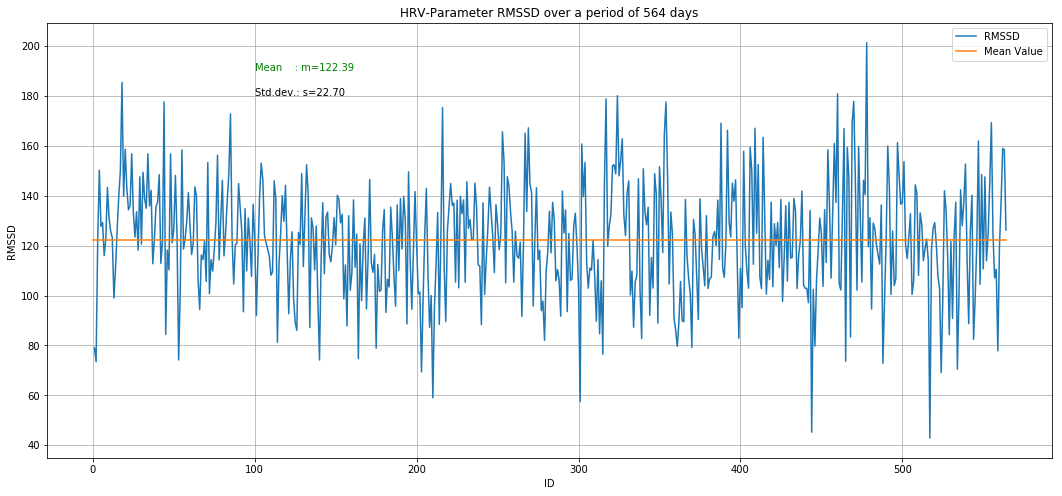

In [11]:
xName="ID"
yName="RMSSD"
xpar=header.index(xName) #Determine the column index of the parameter on the x-axis
ypar=header.index(yName) #Determine the column index of the parameter on the y-axis  
mean = hrv.mean(axis=0)[ypar]
std = hrv.std(axis=0)[ypar]
plt.figure(figsize=(18,8)) #optional, e.g. for defining a non-default figure-size
plt.plot(hrv[:,xpar],hrv[:,ypar],label=yName)
plt.grid(True) #plot a grid
#plt.hold(True) #for plotting more than one curve into a single figure
plt.xlabel(xName)
plt.ylabel(yName)
plt.title("HRV-Parameter %s over a period of %3d days"%(yName,numRows)) #Define title of figure
plt.text(100,190,r"Mean    : m=%3.2f"%(mean),color="g")
plt.text(100,180,r"Std.dev.: s=%3.2f"%(std))
plt.plot([0,numRows],[mean,mean],label="Mean Value")
plt.legend() #plot a legend with the curve's label
plt.show() #necessary for displaying the figure in an external window

## Styles of lines and markers

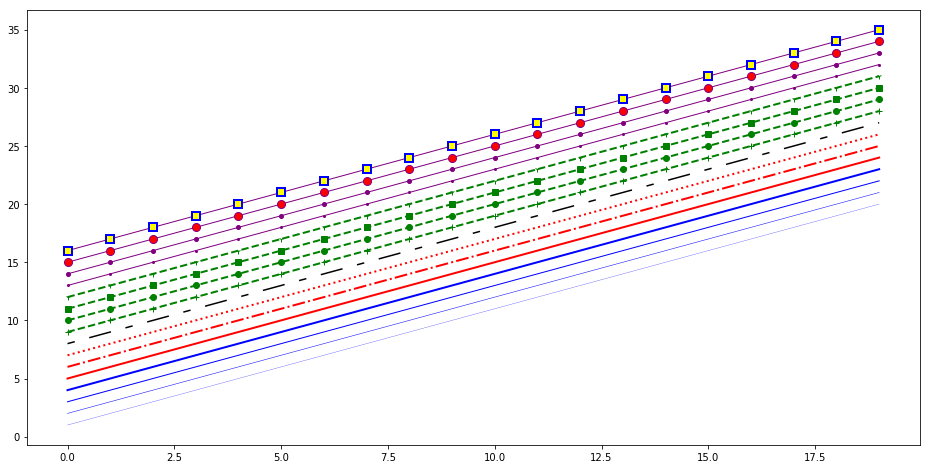

In [12]:
x=np.arange(20)
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

## Multiple curves in a single plot
After setting 
`plt.hold(True)`
multiple curves can be added to a single figure by just repeatedly calling the `plt.plot()` function with the curve-specific coordinates. In order to distinguish the curves individual colors, markers, linestyles or linewidths can be assigned.

/Users/maucher/anaconda/envs/neuralnets3x/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  # Remove the CWD from sys.path while we load stuff.
/Users/maucher/anaconda/envs/neuralnets3x/lib/python3.6/site-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/maucher/anaconda/envs/neuralnets3x/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


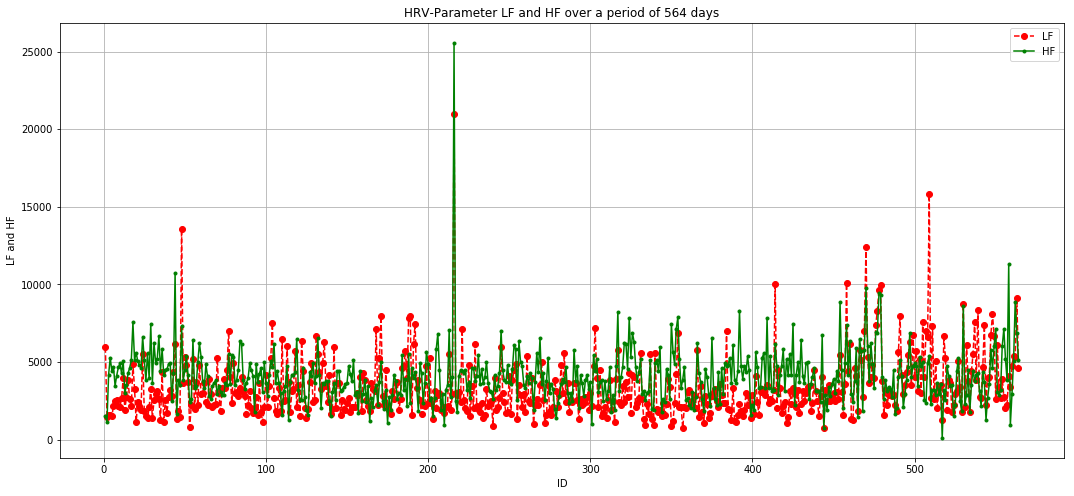

In [13]:
xName="ID"
y1Name="LF"
y2Name="HF"
xpar=header.index(xName)
y1par=header.index(y1Name)
y2par=header.index(y2Name)
plt.figure(figsize=(18,8))
plt.plot(hrv[:,xpar],hrv[:,y1par],label=y1Name,color='r',marker='o',linestyle='--')
plt.grid(True)
plt.hold(True)
plt.plot(hrv[:,xpar],hrv[:,y2par],label=y2Name,color='g',marker='.',linestyle='-')
plt.xlabel(header[xpar])
plt.ylabel(y1Name+" and "+y2Name)
plt.title("HRV-Parameter %s and %s over a period of %3d days"%(y1Name,y2Name,numRows)) #Define title of figure
plt.legend()
plt.show()

## Multiple curves in a single plot with different value ranges

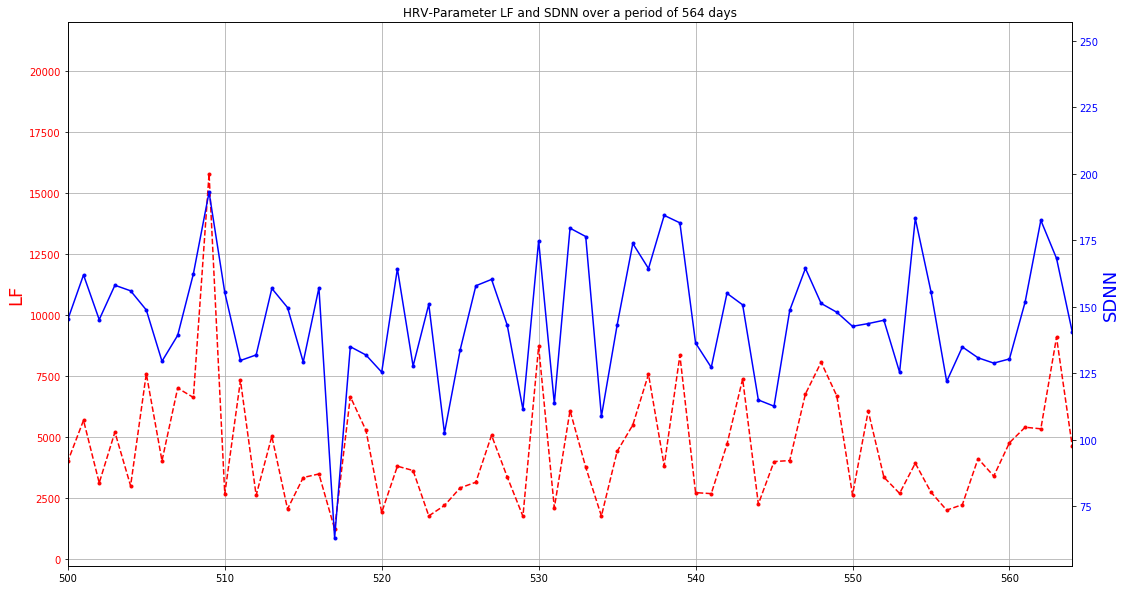

In [14]:
xName="ID"
y1Name="LF"
y2Name="SDNN"
xpar=header.index(xName)
y1par=header.index(y1Name)
y2par=header.index(y2Name)
fig, ax1 = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(10)
ax1.plot(hrv[:,xpar],hrv[:,y1par],label=y1Name,color='r',marker='.',linestyle='--')
ax1.set_ylabel(y1Name, fontsize=18, color="r")
for label in ax1.get_yticklabels():
    label.set_color("r")
ax1.grid(True)
    
ax2 = ax1.twinx()    
ax2.plot(hrv[:,xpar],hrv[:,y2par],label=y2Name,color='b',marker='.',linestyle='-')
ax2.set_xlabel(header[xpar])
ax2.set_ylabel(y2Name, fontsize=18, color="b")
ax2.set_ylabel(y2Name)
for label in ax2.get_yticklabels():
    label.set_color("b")
plt.title("HRV-Parameter %s and %s over a period of %3d days"%(y1Name,y2Name,numRows)) #Define title of figure
Xmin=500
Xmax=numRows
plt.xlim([Xmin,Xmax])

plt.show()

## Multiple Plots in a single figure
Multiple plots can be arranged in a single figure by applying the `pyplot`-function `subplot()`. The first parameter in `subplot()` defines the number of rows, and the second parameter defines the number of columns of the matrix, in which the subplots shall be arranged. The third parameter of `subplot()` defines the index of the matrix-element into which the next plot shall be placed. The subplot in the top-left has the number 1 and counting from left to right and from top to bottom the subplot in the lowest right has the maximum index.

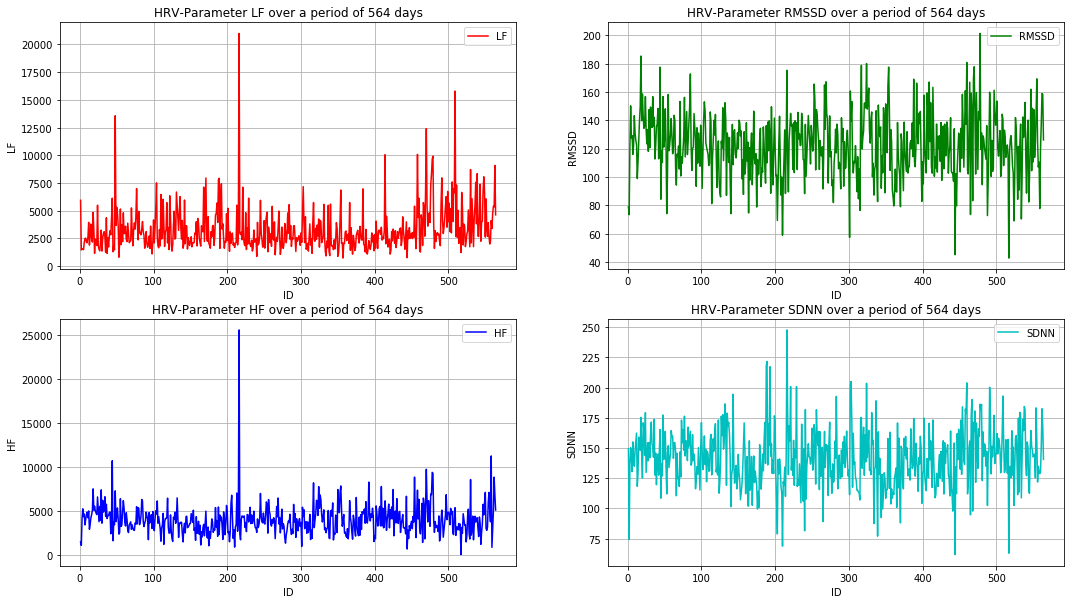

In [15]:
xName="ID"
y1Name="LF"
y3Name="HF"
y2Name="RMSSD"
y4Name="SDNN"
xpar=header.index(xName)
y1par=header.index(y1Name)
y2par=header.index(y2Name)
y3par=header.index(y3Name)
y4par=header.index(y4Name)
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.plot(hrv[:,xpar],hrv[:,y1par],label=y1Name,color='r')
plt.grid(True)
plt.xlabel(header[xpar])
plt.ylabel(y1Name)
plt.title("HRV-Parameter %s over a period of %3d days"%(y1Name,numRows)) #Define title of figure
plt.legend()
plt.subplot(2,2,2)
plt.plot(hrv[:,xpar],hrv[:,y2par],label=y2Name,color='g')
plt.grid(True)
plt.xlabel(header[xpar])
plt.ylabel(y2Name)
plt.title("HRV-Parameter %s over a period of %3d days"%(y2Name,numRows)) #Define title of figure
plt.legend()
plt.subplot(2,2,3)
plt.plot(hrv[:,xpar],hrv[:,y3par],label=y3Name,color='b')
plt.grid(True)
plt.xlabel(header[xpar])
plt.ylabel(y3Name)
plt.title("HRV-Parameter %s over a period of %3d days"%(y3Name,numRows)) #Define title of figure
plt.legend()
plt.subplot(2,2,4)
plt.plot(hrv[:,xpar],hrv[:,y4par],label=y4Name,color='c')
plt.grid(True)
plt.xlabel(header[xpar])
plt.ylabel(y4Name)
plt.title("HRV-Parameter %s over a period of %3d days"%(y4Name,numRows)) #Define title of figure
plt.legend()
plt.show()

## Scatter plots
Sets of 2-dimensional points can be represented in scatter-plots. The same function `plot()` is applied as in the case of plotting curves. The difference is just, that for scatter-plots the individual points are not connected by a line. For this set `linestyle="None"` in the `plot()`-function. In the example below the x- and y-range shall not be automatically determined by the minimum and maximum values of the data. Instead it shall be set manually. This is done by specifying the desired ranges as parameters in `plt.xlim()` and `plt.ylim()`, respectively.

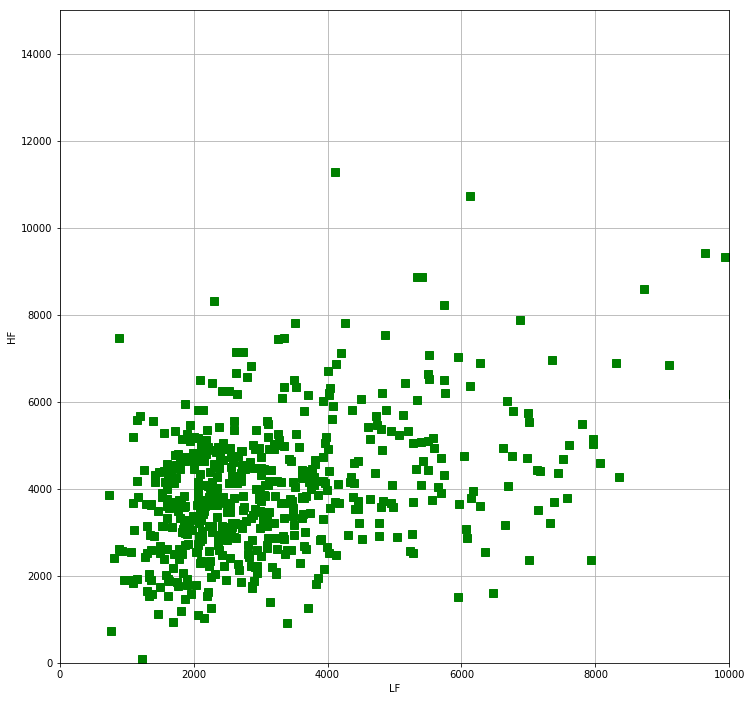

In [16]:
y1Name="LF"
y2Name="HF"
y1par=header.index(y1Name)
y2par=header.index(y2Name)
plt.figure(figsize=(12,12))
plt.plot(hrv[:,y1par],hrv[:,y2par],color='g',linestyle="None",marker="s",markersize=8)
plt.grid(True)
plt.xlabel(y1Name)
plt.ylabel(y2Name)
plt.xlim([0,10000])  #specifiy the x-range to display
plt.ylim([0,15000])  #specify the y-range to display
plt.show()

## Bar Charts

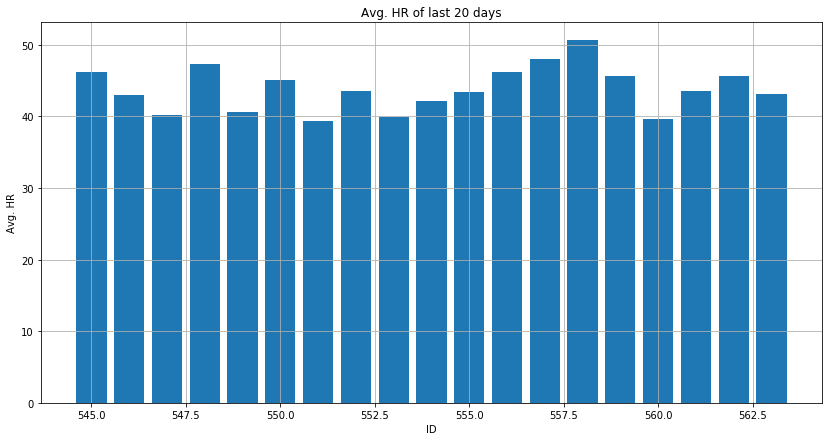

In [17]:
xName="ID"
yName="Avg. HR"
xpar=header.index(xName)
ypar=header.index(yName)
NumEl=20
plt.figure(figsize=(14,7))
plt.bar(hrv[-NumEl:-1,xpar],hrv[-NumEl:-1,ypar])
plt.grid(True)
plt.xlabel(xName)
plt.ylabel(yName)
plt.title("%s of last %d days"%(yName,NumEl))
plt.show()

## Histograms

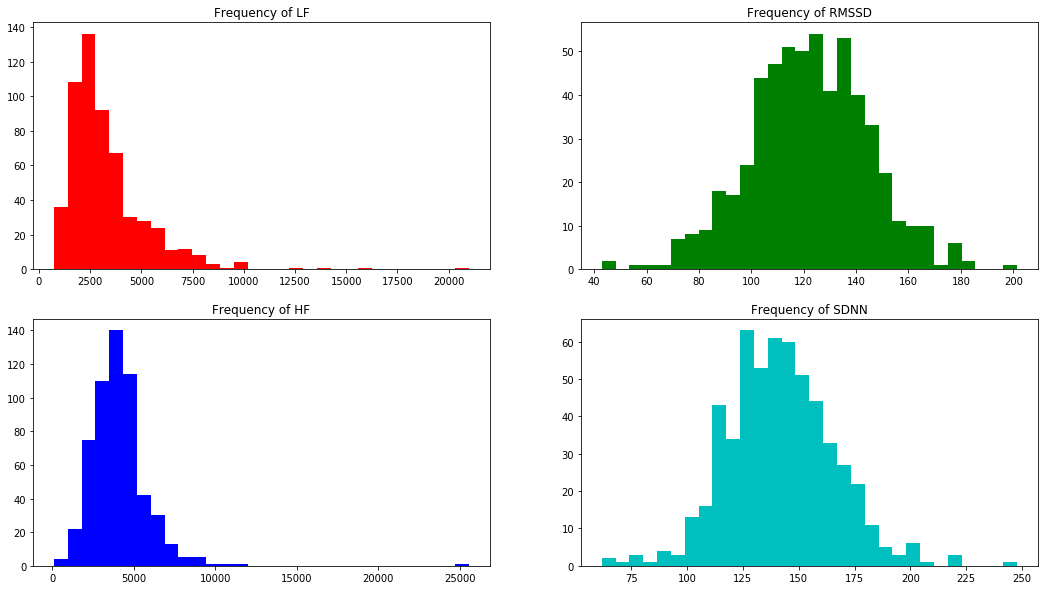

In [18]:
xName="ID"
y1Name="LF"
y3Name="HF"
y2Name="RMSSD"
y4Name="SDNN"
xpar=header.index(xName)
y1par=header.index(y1Name)
y2par=header.index(y2Name)
y3par=header.index(y3Name)
y4par=header.index(y4Name)
B=30
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.hist(hrv[:,y1par],B,color='r')
plt.title("Frequency of %s"%y1Name)
plt.subplot(2,2,2)
plt.hist(hrv[:,y2par],B,color='g')
plt.title("Frequency of %s"%y2Name)
plt.subplot(2,2,3)
plt.hist(hrv[:,y3par],B,color='b')
plt.title("Frequency of %s"%y3Name)
plt.subplot(2,2,4)
plt.hist(hrv[:,y4par],B,color='c')
plt.title("Frequency of %s"%y4Name)
plt.show()

## Visual Correlation Analysis

In [19]:
print(header)

['ID', 'Avg. HR', 'RMSSD', 'SDNN', 'pNN50', 'RRmin', 'RRmean', 'RRmax', 'LF', 'HF', 'LF/HF']


In [20]:
hrvSubset=['Avg. HR','RMSSD', 'SDNN','LF', 'HF']
numSubs=len(hrvSubset)

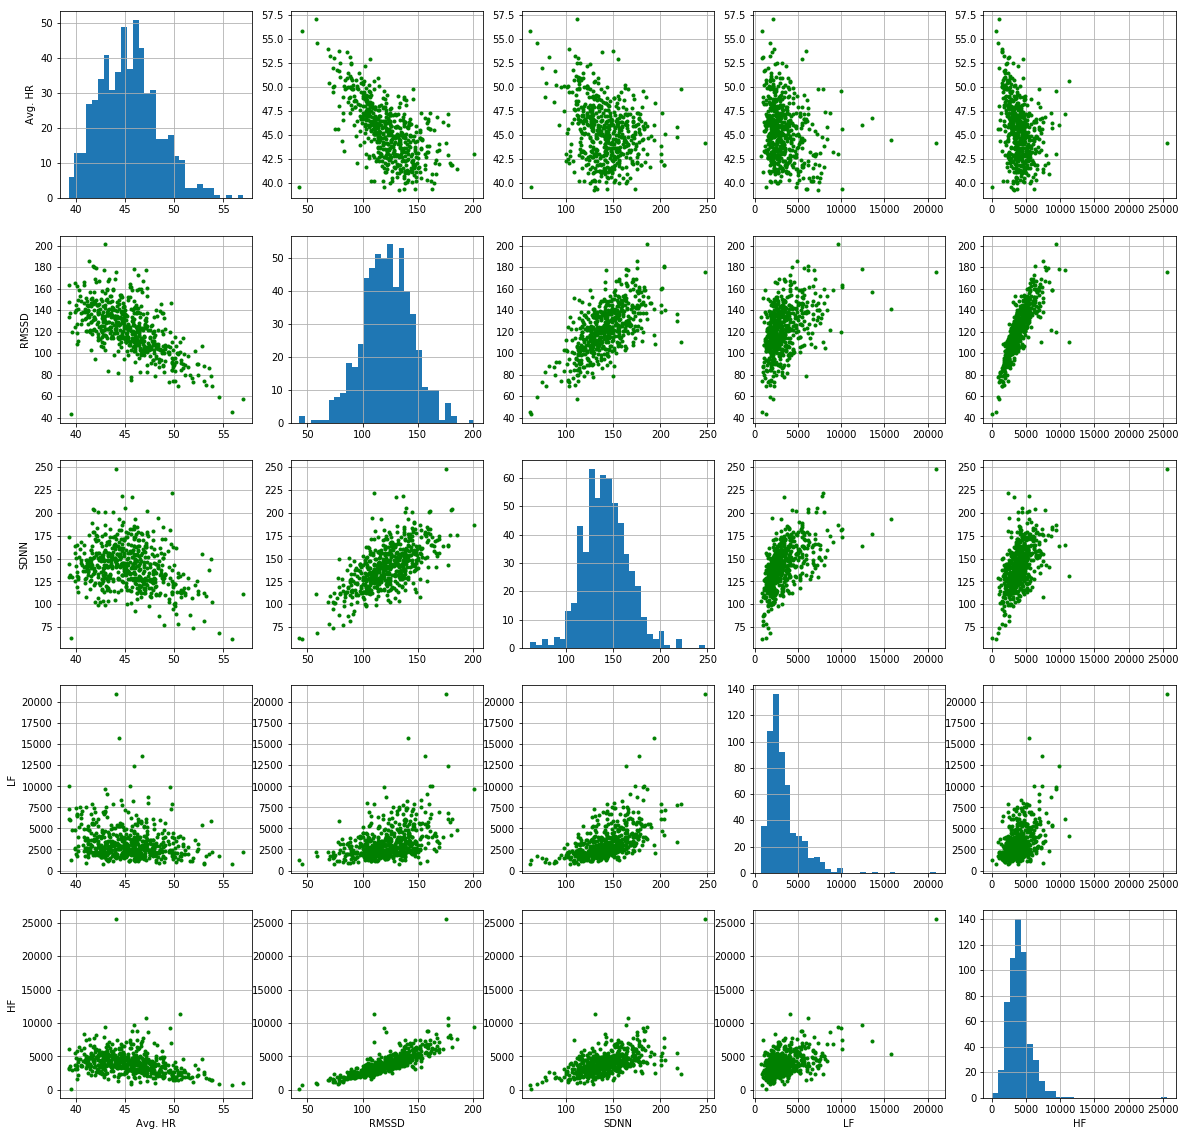

In [21]:
plt.figure(figsize=(20,20))
for row in range(numSubs):
    y1Name=hrvSubset[row]
    y1par=header.index(y1Name)
    for col in range(numSubs):
        plotCount=row*numSubs+col+1
        plt.subplot(numSubs,numSubs,plotCount)
        x1Name=hrvSubset[col]
        x1par=header.index(x1Name)
        if row==col:
            plt.hist(hrv[:,x1par],B)
        else:
            plt.plot(hrv[:,x1par],hrv[:,y1par],color='g',linestyle="None",marker=".",markersize=6)
        plt.grid(True)
        if row==numSubs-1:
            plt.xlabel(x1Name)
        if col==0:
            plt.ylabel(y1Name)
plt.show()